In [ ]:
# load libraries
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from pycaret.regression import setup, create_model, plot_model, save_model
from pycaret.regression import load_model, predict_model

In [ ]:
# load dataset
insurance = get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# init environment
r1 = setup(
    insurance,
    target = "charges",
    session_id = 123,
    normalize = True,
    polynomial_features = True,
    bin_numeric_features= ["age", "bmi"]
)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [ ]:
# train a model
lr = create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3038.4351,21740498.9755,4662.6708,0.8701,0.3988,0.3169
1,3400.4242,32750032.3318,5722.7644,0.8096,0.4433,0.3095
2,3087.0819,23131605.6679,4809.5328,0.7071,0.5074,0.3895
3,2939.4254,20596763.2995,4538.3657,0.8280,0.4446,0.3809
4,3163.5142,28166408.2597,5307.2034,0.7905,0.5133,0.3002
5,3156.5588,24079039.3188,4907.0398,0.8451,0.4039,0.3059
6,2719.4197,21834367.2512,4672.7259,0.8514,0.3749,0.2936
7,3398.7133,29663584.7634,5446.4286,0.8369,0.4519,0.2909
8,3289.9471,25306232.1075,5030.5300,0.8365,0.4162,0.3569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

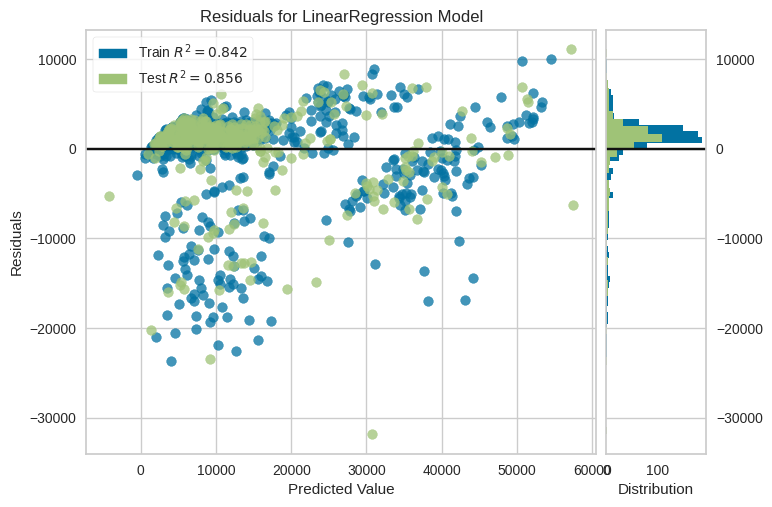

In [ ]:
# plot residuals
plot_model(lr)

In [ ]:
# save pipeline/model
save_model(lr, model_name = "model_03052024")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                 

In [26]:
# load pipeline/model
model = load_model("model_03052024")

Transformation Pipeline and Model Successfully Loaded


In [29]:
# make a prediction
cols = ["age", "sex", "bmi", "children", "smoker", "region"]
int_features  = ["20", "male", "27.0", "2", "yes", "southeast"]
final = np.array(int_features)
data_unseen = pd.DataFrame([final], columns=cols)
prediction = predict_model(model, data=data_unseen, round=0)
prediction = int(prediction.loc[0, "prediction_label"])
print(f"Expected Bill will be {prediction}")